Ключи sber: 
Index(['<DATE>_<TIME>', '<TICKER>', '<PER>', '<OPEN>', '<HIGH>', '<LOW>',
       '<CLOSE>', '<VOL>'],
      dtype='object')
Правильность на тестовом наборе: 0.87
разница прогноза и исходных данных:
 0    -0.085254
1    -0.304317
2     0.115458
3     0.197221
4    -0.440755
5    -1.070755
6    -0.763529
7    -0.415104
8     0.284596
9    -0.973304
10   -1.411317
11   -5.735554
12   -0.735988
13   -0.467375
14    0.122025
15    0.373862
16   -1.413363
17   -2.087525
18   -4.764124
19   -0.185934
20    0.484778
21   -0.572110
22   -1.062860
23    1.574666
24   -1.237986
25   -0.821210
26   -0.352560
27   -0.802597
28   -5.409834
29    0.461157
        ...   
70   -1.472828
71   -1.247139
72   -2.190476
73   -2.269962
74   -3.076861
75    0.203166
76   -0.394622
77    0.075266
78    0.166953
79   -0.780985
80   -0.192335
81   -0.721060
82   -1.387959
83    0.778067
84    0.392453
85   -0.304547
86   -0.144247
87   -0.223610
88   -0.142785
89    1.368115
90    0.724676
91   -3.

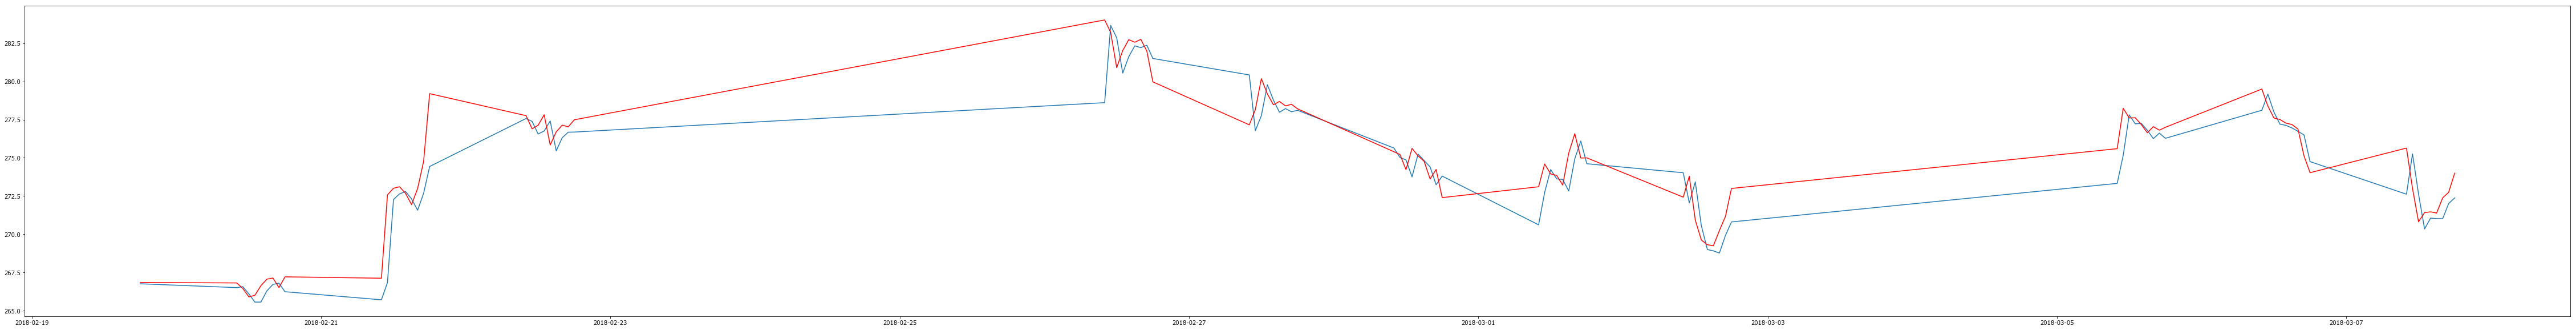

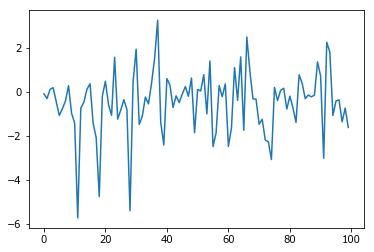

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import read_csv, DataFrame, Series
from IPython.display import display
from sklearn.neural_network import MLPRegressor


df1 = read_csv('E:\Python\SBER_160101_180307.csv',parse_dates=[['<DATE>','<TIME>']]) #заливаем csv файл с коировками, скаченными с finam

a1 = 100     #переменная, которая задает количество прогнозов, которые мыхотим получить, можно так же
             #задать как a1= int(len(df1)*0.1), если хотим проверить нашу модель на 10% от выборки
    
print("Ключи sber: \n{}".format(df1.keys())) #вспомогательная строка, показывает какие колонки у нас есть(только названия), 
                                             #можно удалить

X_train = df1['<OPEN>'][:-a1]          #обучающая выборка

X_test = df1['<OPEN>'][-a1:]           #тестовая выборка

y_train = df1['<CLOSE>'][:-a1]         #цель обучающей выборки

y_test = df1['<CLOSE>'][-a1:]          #реальные данные соответствующие тестовой выборке, цель, которую нужно в идеале 
                                       #достич нашей прогнозной моделью

nn = MLPRegressor(hidden_layer_sizes=(10,))  #задаем модель 

X_train = X_train.values.reshape(-1, 1)     #подготавливаем выборки
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
nn.fit(X_train, y_train.ravel())            #обучаем

y_pred = nn.predict(X_test)                 #прогноз, который нам выдает по тестовой выборке

date1 = df1['<DATE>_<TIME>']
date1 = date1.values.reshape(-1, 1)         #для построения графика

print("Правильность на тестовом наборе: {:.2f}".format(nn.score(X_test, y_test)))

y_pred=pd.Series(y_pred, dtype=float)              #форматируем в формат series pandas
df2 = df1[-a1:]                                    #создаем новый датафрейм для удобства оценки предсказанных результатов
df2 = df2.reset_index()                            #сбрасываем индексы старого датафрейма
df2['y_pred']= pd.Series(y_pred, index=df2.index)  #добавляем предсказанные результаты новой колонкой в датафрейм

diff_btw_targ_pred =(df2['y_pred'] - df2['<CLOSE>'])      #разница предсказанных значений и реальных  
max1 = diff_btw_targ_pred[diff_btw_targ_pred>0].max()
min1 = diff_btw_targ_pred[diff_btw_targ_pred>0].min()
avg1 = diff_btw_targ_pred[diff_btw_targ_pred>0].mean()
max2 = diff_btw_targ_pred[diff_btw_targ_pred<0].max()
min2 = diff_btw_targ_pred[diff_btw_targ_pred<0].min()
avg2 = diff_btw_targ_pred[diff_btw_targ_pred<0].mean()
print("разница прогноза и исходных данных:\n {}".format(diff_btw_targ_pred))
print(max1,min1,max2,min2,avg1,avg2)          #min,max,avg положительных и отрицательных разниц

plt.figure(figsize=(80,10))                   #график предсказанных значений и реальных
plt.plot(date1[-a1:], df2['y_pred'])
plt.plot(date1[-a1:], df2['<CLOSE>'],c='r')
plt.figure()
plt.plot(diff_btw_targ_pred)                 #график разницы предсказанных значений и реальных
